In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
file_path = '/content/drive/MyDrive/Processed_Flipdata.csv'
ds = pd.read_csv(file_path)

# New Section

In [155]:
ds.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [156]:
ds.dtypes

,0
Unnamed: 0,int64
Model,object
Colour,object
Memory,int64
RAM,int64
Battery_,int64
Rear Camera,object
Front Camera,object
AI Lens,int64
Mobile Height,float64


In [157]:
# Convert 'Prize' column string columns to numaric columns (float data type) using .str accessor
ds['Prize'] = ds['Prize'].astype(str).str.replace(',', '').astype(float)
ds['Prize']


,Prize
0,7299.0
1,7299.0
2,11999.0
3,5649.0
4,8999.0
...,...
536,79999.0
537,5998.0
538,9990.0
539,38999.0


We have to change the data types of prize because prize in objective dtypes but actuallty it is a numaric value so we use astype function to change value in
objective to float

In [158]:
ds['Front Camera'] = ds['Front Camera'].astype(str).str.replace('MP', '').astype(float)
ds['Rear Camera'] = ds['Rear Camera'].astype(str).str.replace('MP', '').astype(float)


We have to change the data type of front camara, rear camera or prize to convert it in numarical (float) format.


Same we have found front camara and rear camra in objective dtype because its "MP" postfix So we use as type function to change dtypes of both by replace MP by empty



In [159]:
ds.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [160]:
ds.dtypes

,0
Unnamed: 0,int64
Model,object
Colour,object
Memory,int64
RAM,int64
Battery_,int64
Rear Camera,float64
Front Camera,float64
AI Lens,int64
Mobile Height,float64


We get all data type in int and float apart from color, model and processor are objective data type

In [161]:
ds.head(10)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50.0,16.0,0,16.64,Qualcomm Snapdragon 680,11999.0
3,3,POCO C50,Royal Blue,32,2,5000,8.0,5.0,0,16.56,Mediatek Helio A22,5649.0
4,4,Infinix HOT 30i,Marigold,128,8,5000,50.0,5.0,1,16.76,G37,8999.0
5,5,Infinix HOT 30i,Glacier Blue,128,8,5000,50.0,5.0,1,16.76,G37,8999.0
6,6,Infinix HOT 30i,Mirror Black,128,8,5000,50.0,5.0,1,16.76,G37,8999.0
7,7,Infinix HOT 30i,Diamond White,128,8,5000,50.0,5.0,1,16.76,G37,8999.0
8,8,Infinix HOT 30i,Diamond White,64,4,5000,50.0,5.0,1,16.76,G37,7999.0
9,9,Infinix HOT 30i,Mirror Black,64,4,5000,50.0,5.0,1,16.76,G37,7999.0


In [162]:
# check duplicacy
ds.duplicated().sum()

0

In [163]:
duplicates = ds[ds.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Mobile Height, Processor_, Prize]
Index: []


In [164]:
# remove duplicate values
ds= ds.drop_duplicates()
ds.duplicated().sum()

0

In [165]:
# drop unname columns because it have only srial no so it is use less

In [166]:
ds = ds.drop(['Unnamed: 0'], axis=1, errors='ignore')
ds.head(2)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0


In [167]:
# Separate numeric and categorical columns
categorical_columns = ds.select_dtypes(include=['object', 'category', 'string']).columns

# Display categorical columns
print("Categorical Columns:")
print(ds[categorical_columns])


Categorical Columns:
                     Model          Colour                   Processor_
0          Infinix SMART 7     Night Black   Unisoc Spreadtrum SC9863A1
1          Infinix SMART 7      Azure Blue   Unisoc Spreadtrum SC9863A1
2             MOTOROLA G32    Mineral Gray      Qualcomm Snapdragon 680
3                 POCO C50      Royal Blue           Mediatek Helio A22
4          Infinix HOT 30i        Marigold                          G37
..                     ...             ...                          ...
536  SAMSUNG Galaxy S23 5G           Cream  Qualcomm Snapdragon 8 Gen 2
537               LAVA Z21            Cyan                    Octa Core
538         Tecno Spark 8T  Turquoise Cyan           MediaTek Helio G35
539  SAMSUNG Galaxy A54 5G    Awesome Lime      Exynos 1380, Octa Core 
540               OPPO A77        Sky Blue           Mediatek Helio G35

[541 rows x 3 columns]


In [168]:
# we saparate all categorical columns to encode them

In [169]:
ds.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [170]:
ds.describe()

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,46.110906,11.992606,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,31.260416,9.053746,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.000000




# description of dataset

1. In this dataset target/dependent variable is prize and memory, ram, battery mobile heights are independent variable

2. Memory: - As per given dataset min memoey is 16 gb, and max memory is 256 gb

3. Battery:- mean is 4871.587800 and min value is 800 so we found there is outlier in min battery side.

4. Count: Total 541 row we are found and there is no null value in it.

5. Prize: Mean of prize is 16228.375231 and min min 920 and max is 80999 so there is posibilities of outlier in the prize columns.



#Defining the problem: Understand the business problem and define success criteria

In [171]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    float64
 6   Front Camera   541 non-null    float64
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 46.6+ KB


In [172]:
#to checking after handle the numeric  missing value
numeric_columns = ds.select_dtypes(include=['number']).columns

# Check null values in numeric columns
print("Null values in numeric columns:")
print(ds[numeric_columns])

Null values in numeric columns:
     Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  Mobile Height  \
0        64    4      6000         13.0           5.0        1          16.76   
1        64    4      6000         13.0           5.0        1          16.76   
2       128    8      5000         50.0          16.0        0          16.64   
3        32    2      5000          8.0           5.0        0          16.56   
4       128    8      5000         50.0           5.0        1          16.76   
..      ...  ...       ...          ...           ...      ...            ...   
536     256    8      3900         50.0          12.0        0          15.49   
537      32    2      3100          5.0           2.0        0          12.70   
538      64    4      5000         50.0           8.0        0          16.76   
539     128    8      5000         50.0          32.0        0          16.26   
540     128    4      5000         50.0           8.0        0          16.66

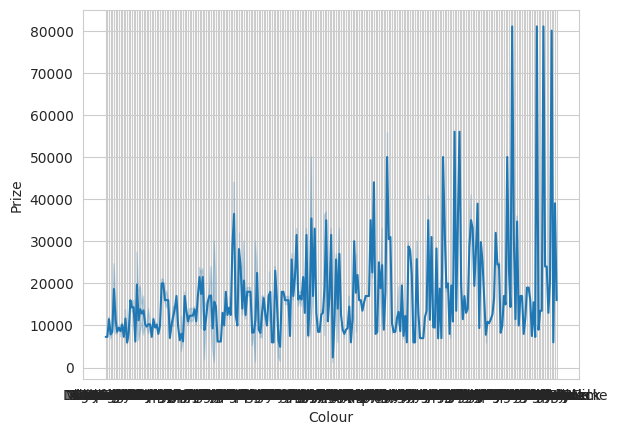

In [173]:
lineplot = sns.lineplot(x='Colour', y='Prize', data=ds)

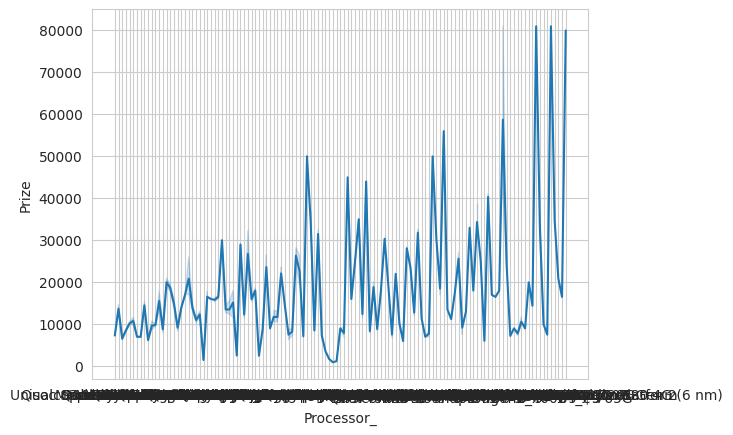

In [174]:
lineplot = sns.lineplot(x='Processor_', y='Prize', data=ds)

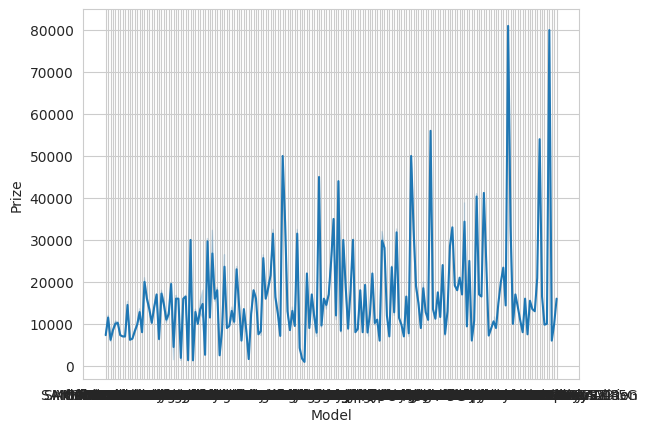

In [175]:
#lineplot = sns.lineplot(x='Model_Encoded', y='Prize', data=ds)
lineplot = sns.lineplot(x='Model', y='Prize', data=ds)

In [176]:
#visiualization by line plot between prize with RAM, battery, rear camera and front camera

#what are the insight you have from got this ?
#what kind of relationship you are finding over here

In [177]:
numeric_columns = ds.select_dtypes(include=['number'])
numeric_columns


,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
0,64,4,6000,13.0,5.0,1,16.76,7299.0
1,64,4,6000,13.0,5.0,1,16.76,7299.0
2,128,8,5000,50.0,16.0,0,16.64,11999.0
3,32,2,5000,8.0,5.0,0,16.56,5649.0
4,128,8,5000,50.0,5.0,1,16.76,8999.0
...,...,...,...,...,...,...,...,...
536,256,8,3900,50.0,12.0,0,15.49,79999.0
537,32,2,3100,5.0,2.0,0,12.70,5998.0
538,64,4,5000,50.0,8.0,0,16.76,9990.0
539,128,8,5000,50.0,32.0,0,16.26,38999.0


In [178]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
Memory,1.000000,0.625284,-0.053210,0.530615,0.496865,-0.094442,0.063163,0.566660
RAM,0.625284,1.000000,-0.104923,0.439558,0.493861,-0.082622,0.092951,0.532024
Battery_,-0.053210,-0.104923,1.000000,0.198260,0.032970,0.150156,0.695641,-0.034297
Rear Camera,0.530615,0.439558,0.198260,1.000000,0.505378,-0.043597,0.239883,0.410367
Front Camera,0.496865,0.493861,0.032970,0.505378,1.000000,-0.111779,0.208012,0.532321
AI Lens,-0.094442,-0.082622,0.150156,-0.043597,-0.111779,1.000000,0.052018,-0.153691
Mobile Height,0.063163,0.092951,0.695641,0.239883,0.208012,0.052018,1.000000,0.176009
Prize,0.566660,0.532024,-0.034297,0.410367,0.532321,-0.153691,0.176009,1.000000


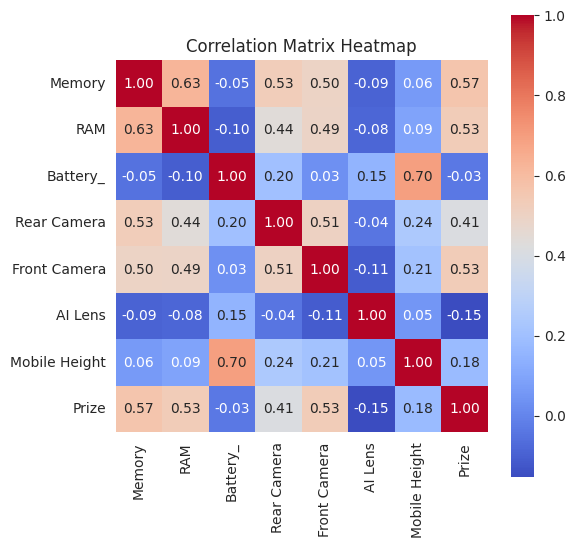

In [179]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

 Key Features and Correlations

**Memory and Price (0.57):**

Positive correlation: Higher memory typically contributes to a higher price.

**RAM and Price (0.53):**

Positive correlation: More RAM generally leads to a higher price.

**Front Camera and Price (0.53):**

Positive correlation: Better front cameras are often associated with more expensive devices.

**Rear Camera and Price (0.41):**

Moderate positive correlation: Rear camera quality also plays a role in pricing but is less influential than front cameras.

**Battery and Price (-0.03):**

Almost no correlation: Battery capacity doesn't significantly affect the price.
AI Lens and Price (-0.15):

Weak negative correlation: AI lens presence may be more common in lower-priced models.

**Mobile Height and Price (0.18):**

Weak positive correlation: Larger mobile height could have a slight effect on pricing.

**2. Internal Feature Correlations**
**Memory and RAM (0.63):**

Strong positive correlation: Devices with more memory often come with more RAM.

**Battery and Mobile Height (0.70):**

Strong positive correlation: Larger battery sizes tend to be found in taller devices.

**Rear Camera and Front Camera (0.51):**

**Positive correlation: High-quality rear cameras often accompany high-quality front cameras.**

**3. Insights for Decision Making**

Price Prediction: Features like memory, RAM, and camera specifications are significant predictors of price.


Product Improvement: Enhancing memory and RAM is likely to justify higher pricing.

Battery Capacity: Although important for users, battery size doesn't strongly

influence price, indicating it might not be a primary focus for premium models.




In [180]:
# we are encoded color column
#Compute the correlation matrix
# we are encoded color column
#Compute the correlation matrix
from sklearn.preprocessing import LabelEncoder

# Check if 'Processor_' column exists before encoding
if 'Processor_' in ds.columns:
    # Encode the processor names to numeric values
    label_encoder = LabelEncoder()
    ds['Processor_Encoded'] = label_encoder.fit_transform(ds['Processor_'])
    ds['Colour_Encoded'] = label_encoder.fit_transform(ds['Colour'])
    ds['Model_Encoded'] = label_encoder.fit_transform(ds['Model'])
else:
    print("Warning: 'Processor_' column not found. Skipping encoding.")

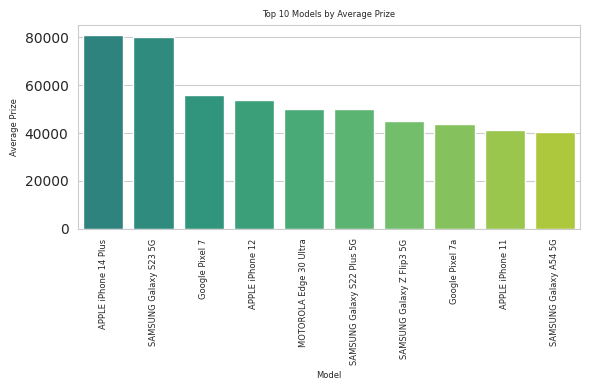

In [181]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


top_n = 10
avg_prices = ds.groupby('Model')['Prize'].mean().reset_index().nlargest(top_n,'Prize')

plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0.5,0.9,len(avg_prices))]

sns.barplot(x='Model', y='Prize', hue="Model", data=avg_prices, palette=colors,legend=False)
plt.xlabel('Model',fontsize=6)
plt.ylabel('Average Prize',fontsize=6)
plt.title('Top {} Models by Average Prize'.format(top_n), fontsize=6)
plt.xticks(rotation=90,fontsize=6)
plt.tight_layout()
plt.show()


The bar chart titled "Top 10 Models by Average Price" compares the average prices of ten popular smartphone models. Key insights include:

Highest Average Prices:

The Apple iPhone 14 Plus and Samsung Galaxy S23 5G have the highest average prices, exceeding ₹80,000.
Mid-Tier Models:

Models like Google Pixel 7, Apple iPhone 12, and Motorola Edge 30 Ultra fall in the mid-range price category, around ₹50,000–₹60,000.
Lower Price Range:

Models such as Samsung Galaxy A54 5G and Apple iPhone 11 have the lowest average prices among the top 10, under ₹40,000.

In [182]:
#Describe the output
# which feature having strong correlation ?
# what analysis u hv come from over this ?
#you have to write the insight of this


In [217]:
#outlier_values

# Identify outliers using the IQR method
numeric_columns = ds.select_dtypes(include=['number']).columns

outliers_iqr = {}
for col in numeric_columns:
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = ds[(ds[col] < lower_bound) | (ds[col] > upper_bound)]
    outliers_iqr[col] = outliers[col].tolist()

print("Outliers using IQR Method:")
for col, outlier_values in outliers_iqr.items():
    print(f"{col}: {outlier_values}")

Outliers using IQR Method:
Memory: [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
RAM: []
Battery_: [6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 4500.0, 4500.0, 4500.0, 4500.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 6000.0, 4871.587800369686, 4871.587800369686, 6000.0, 6000.0, 6000.0, 4871.587800369686, 4400.0, 4871.587800369686, 6000.0, 6000.0, 6000.0, 4871.587800369686, 4410.0, 4410.0, 4871.587800369686, 4400.0, 4871.587800369686, 4871.587800369686, 5080.0, 6000.0, 2550.0, 4871.587800369686, 4871.587800369686, 4980.0, 4980.0, 4500.0, 4600.0, 6000.0, 6000.0, 6000.0, 6000.0, 4600.0, 6000.0, 4871.587800369686, 4871.587800369686, 4871.587800369686, 4871.587800369686, 6000.0, 4871.587800369686, 4980.0, 4500.0, 4500.0, 6

In [227]:
import numpy as np
import pandas as pd

# Function to handle outliers using percentiles
def handle_outliers(dataset, columns, method="winsorize", lower_percentile=0.01, upper_percentile=0.99):

    for col in columns:
        # Calculate the lower and upper percentiles
        lower_bound = dataset[col].quantile(lower_percentile)
        upper_bound = dataset[col].quantile(upper_percentile)

        if method == "winsorize":
            # Cap the outliers to the lower and upper percentile boundaries
            dataset[col] = dataset[col].apply(
                lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
            )
        elif method == "z-score":
            # Replace outliers with the mean based on z-score
            mean = dataset[col].mean()
            std_dev = dataset[col].std()
            z_scores = (dataset[col] - mean) / std_dev
            dataset[col] = dataset[col].apply(
                lambda x: mean if abs((x - mean) / std_dev) > 3 else x
            )

    return dataset


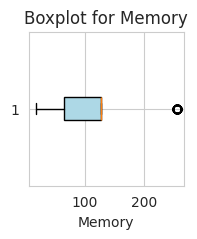

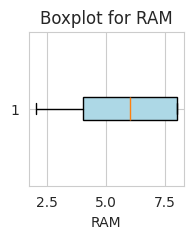

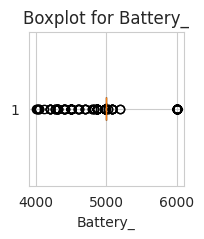

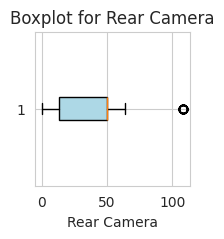

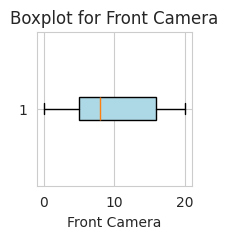

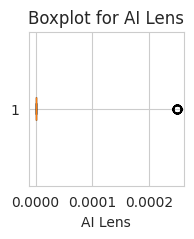

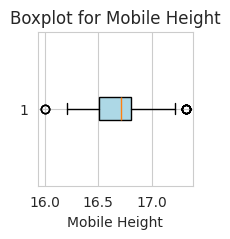

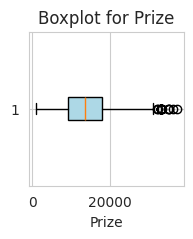

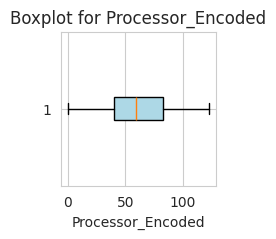

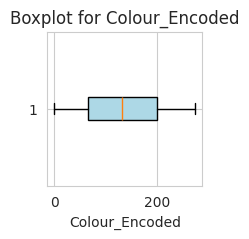

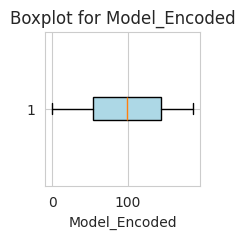

In [228]:
import matplotlib.pyplot as plt



# Define a function to plot boxplots for multiple columns
def plot_boxplots(ds, cleaned_data):
    """
    Plots boxplots for the specified columns in the dataset.

    Parameters:
    - df (DataFrame): The dataset
    - columns (list): List of columns to plot boxplots
    """
    for col in cleaned_data:
        plt.figure(figsize=(2, 2))
        plt.boxplot(ds[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.title(f'Boxplot for {col}')
        plt.xlabel(col)
        plt.show()

# Plot boxplots for cleaned data
plot_boxplots(cleaned_data, numeric_columns)

In [229]:
def Prize_range(prize):
    if prize < 20000:
        return 'low'
    elif 20000 <= prize < 40000:
        return 'medium'
    else:
        return 'high'


In [230]:
# Apply the Prize_range function to the Prize column
ds['Prize_range'] = ds['Prize'].apply(Prize_range)

# Display the Model and Prize_range
print(ds[['Model', 'Prize', 'Prize_range']])

                     Model         Prize Prize_range
0          Infinix SMART 7   7299.000000         low
1          Infinix SMART 7   7299.000000         low
2             MOTOROLA G32  11999.000000         low
3                 POCO C50   5649.000000         low
4          Infinix HOT 30i   8999.000000         low
..                     ...           ...         ...
536  SAMSUNG Galaxy S23 5G  16228.375231         low
537               LAVA Z21   5998.000000         low
538         Tecno Spark 8T   9990.000000         low
539  SAMSUNG Galaxy A54 5G  14916.445580         low
540               OPPO A77  15999.000000         low

[541 rows x 3 columns]


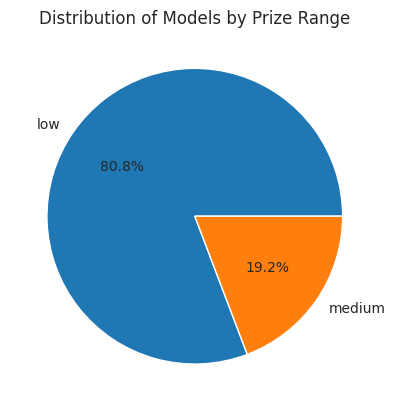

In [231]:
#pie chart of model and prize Range
plt.pie(ds['Prize_range'].value_counts(), labels=ds['Prize_range'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Models by Prize Range')
plt.show()

The provided chart is a pie chart titled "Distribution of Models by Price Range." It visualizes the percentage distribution of mobile handset models across three price categories: low, medium, and high. Here’s a description of the distribution:


Low Price Range: Represents the majority, making up 79.1% of the models.
Medium Price Range: Constitutes a smaller segment, accounting for 19.6% of the models.


High Price Range: Forms a minimal portion, contributing only 1.3% of the models.
This chart indicates that most handsets in the dataset are in the low-price segment, while premium-priced models are very limited. It suggests a strong market presence in the budget category and a niche market for high-end devices.

In [232]:
# Get the 'High', 'Medium', and 'Low' priced models
high_priced_models = ds[ds['Prize_range'] == 'High']
medium_priced_models = ds[ds['Prize_range'] == 'Medium']
low_priced_models = ds[ds['Prize_range'] == 'Low']

# Display the lists
print("High Priced Models:\n", high_priced_models[['Model', 'Prize']])
print("\nMedium Priced Models:\n", medium_priced_models[['Model', 'Prize']])
print("\nLow Priced Models:\n", low_priced_models[['Model', 'Prize']])

High Priced Models:
 Empty DataFrame
Columns: [Model, Prize]
Index: []

Medium Priced Models:
 Empty DataFrame
Columns: [Model, Prize]
Index: []

Low Priced Models:
 Empty DataFrame
Columns: [Model, Prize]
Index: []


In [233]:
#data standerdation and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [234]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(ds[numeric_columns])
standardized_data


array([[-0.76886767, -0.70466488,  2.82061122, ...,  1.58733302,
         0.31449812, -1.40347425],
       [-0.76886767, -0.70466488,  2.82061122, ...,  1.58733302,
        -1.44818683, -1.40347425],
       [ 0.28820325,  1.31239173, -0.00516746, ...,  0.41544506,
         0.18768625, -1.13714714],
       ...,
       [-0.76886767, -0.70466488, -0.00516746, ..., -0.81812122,
         1.58261678,  0.49886225],
       [ 0.28820325,  1.31239173, -0.00516746, ..., -1.55826099,
        -1.48623039,  0.25155851],
       [ 0.28820325, -0.70466488, -0.00516746, ..., -0.13965977,
         1.02464457, -0.71863311]])

In [235]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(ds[numeric_columns])
normalized_data



array([[0.2       , 0.33333333, 1.        , ..., 0.92622951, 0.58029197,
        0.12365591],
       [0.2       , 0.33333333, 1.        , ..., 0.92622951, 0.0729927 ,
        0.12365591],
       [0.46666667, 1.        , 0.5       , ..., 0.6147541 , 0.54379562,
        0.19892473],
       ...,
       [0.2       , 0.33333333, 0.5       , ..., 0.28688525, 0.94525547,
        0.66129032],
       [0.46666667, 1.        , 0.5       , ..., 0.09016393, 0.0620438 ,
        0.59139785],
       [0.46666667, 0.33333333, 0.5       , ..., 0.46721311, 0.78467153,
        0.3172043 ]])

In [236]:
#Normalize the dataset numarical value

normalized_ds = pd.DataFrame(normalized_data, columns=numeric_columns)
print(normalized_ds)

       Memory       RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0    0.200000  0.333333  1.000000     0.120370      0.250000      1.0   
1    0.200000  0.333333  1.000000     0.120370      0.250000      1.0   
2    0.466667  1.000000  0.500000     0.462963      0.800000      0.0   
3    0.066667  0.000000  0.500000     0.074074      0.250000      0.0   
4    0.466667  1.000000  0.500000     0.462963      0.250000      1.0   
..        ...       ...       ...          ...           ...      ...   
536  1.000000  1.000000  0.499898     0.462963      0.600000      0.0   
537  0.066667  0.000000  0.488857     0.046296      0.100000      0.0   
538  0.200000  0.333333  0.500000     0.462963      0.400000      0.0   
539  0.466667  1.000000  0.500000     0.462963      0.551377      0.0   
540  0.466667  0.333333  0.500000     0.462963      0.400000      0.0   

     Mobile Height     Prize  Processor_Encoded  Colour_Encoded  Model_Encoded  
0         0.575758  0.176806           0.9

In [256]:
label_encoder = LabelEncoder()
# Check if 'Processor_' column exists before encoding
if 'Processor_' in ds.columns:
    ds['Processor_Encoded'] = label_encoder.fit_transform(ds['Processor_'])
else:
    print("Warning: 'Processor_' column not found. Skipping encoding.")  # Or handle it differently

# Continue with encoding other columns
ds['Colour_Encoded'] = label_encoder.fit_transform(ds['Colour'])
ds['Model_Encoded'] = label_encoder.fit_transform(ds['Model'])

In [197]:
ds.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Encoded,Colour_Encoded,Model_Encoded,Prize_range
0,Infinix SMART 7,Night Black,64,4,6000.0,13.0,5.0,0.062847,16.76,Unisoc Spreadtrum SC9863A1,7299.0,113,159,23,low
1,Infinix SMART 7,Azure Blue,64,4,6000.0,13.0,5.0,0.062847,16.76,Unisoc Spreadtrum SC9863A1,7299.0,113,20,23,low
2,MOTOROLA G32,Mineral Gray,128,8,5000.0,50.0,16.0,0.000000,16.64,Qualcomm Snapdragon 680,11999.0,75,149,37,low
3,POCO C50,Royal Blue,32,2,5000.0,8.0,5.0,0.000000,16.56,Mediatek Helio A22,5649.0,56,201,69,low
4,Infinix HOT 30i,Marigold,128,8,5000.0,50.0,5.0,0.062847,16.76,G37,8999.0,14,130,12,low


In [258]:
#ds.drop(['Processor_'], axis=1, inplace=True)

In [240]:

 ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              541 non-null    object 
 1   Colour             541 non-null    object 
 2   Memory             541 non-null    int64  
 3   RAM                541 non-null    int64  
 4   Battery_           541 non-null    float64
 5   Rear Camera        541 non-null    float64
 6   Front Camera       541 non-null    float64
 7   AI Lens            541 non-null    float64
 8   Mobile Height      541 non-null    float64
 9   Prize              541 non-null    float64
 10  Processor_Encoded  541 non-null    int64  
 11  Colour_Encoded     541 non-null    int64  
 12  Model_Encoded      541 non-null    int64  
 13  Prize_range        541 non-null    object 
dtypes: float64(6), int64(5), object(3)
memory usage: 59.3+ KB


In [259]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [260]:
# Split data before creating new encoded features
X = ds[['Model_Encoded','Colour_Encoded', 'Memory', 'RAM',
         'Rear Camera', 'Front Camera','Mobile Height']]  # Assuming 'Prize' is your target variable
y = ds['Prize']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
from sklearn.ensemble import RandomForestRegressor
# Train a DecisionTreeClassifier
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [262]:

from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
# model prediction
y_pred = model.predict(X_test)
# Evaluate model and find the accuracy

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 1623.0221851128786
R²: 0.8069794965801229


In [263]:
#Training score
print("Training Score:", model.score(X_train, y_train))

Training Score: 0.9781632927579607


In [264]:
#testing score
print("Testing Score:", model.score(X_test, y_test))


Testing Score: 0.8069794965801229


In [205]:
# Separate numeric and categorical features based on the training data
#numeric_features = X_train.select_dtypes(include=['number']).columns
#categorical_features = X_train.select_dtypes(include=['object']).columns


In [265]:
from sklearn.ensemble import RandomForestRegressor

model.fit(X, y)

# Extract feature importance scores
feature_importances = model.feature_importances_

# Create a DataFrame for easy interpretation
importance_df = pd.DataFrame({'Feature': X.columns,'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

          Feature  Importance
5    Front Camera    0.547492
2          Memory    0.111722
0   Model_Encoded    0.110668
4     Rear Camera    0.072538
3             RAM    0.059411
1  Colour_Encoded    0.050893
6   Mobile Height    0.047275


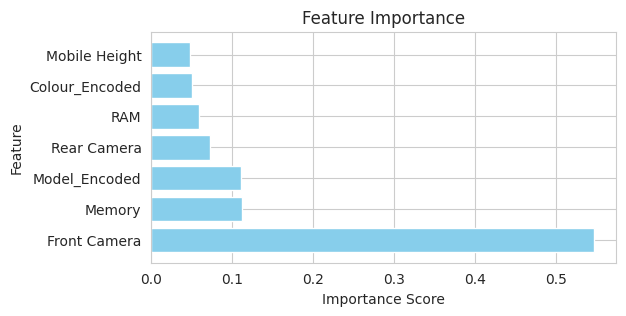

In [266]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(6, 3))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**Observations:**

Front Camera has the highest importance score, indicating it's the most influential feature.

Model_Encoded has moderate importance.

Features like Colour_Encoded, Mobile Height, Rear Camera, RAM, and Memory have lower importance scores, suggesting they contribute less to the model's predictions.

This chart could be generated by a model such as a Random Forest, Gradient Boosting, or other feature importance methods.

In [267]:
#Mutual Information Scores--Measures the dependency between each feature and the target variable.
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information scores
mutual_info = mutual_info_regression
mutual_info = mutual_info(X, y)
mutual_info
#After performing these analyses we have retain the most relevant features for modeling

array([1.01994692, 0.06528378, 0.66080748, 0.67716901, 0.73710847,
       0.81299   , 0.77118598])

In [268]:
#Recursive Feature Elimination (RFE) is a feature selection technique used to select the most important features in a dataset for building a machine learning model.
#The goal is to improve the model’s performance and reduce overfitting by removing less important features.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor()

# Perform RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Model_Encoded', 'Colour_Encoded', 'Memory', 'Rear Camera',
       'Front Camera'],
      dtype='object')


In [269]:
#Lasso Regression Example for Actual and Predicted Prices:
from sklearn.linear_model import Lasso

# Initialize the Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Print the actual and predicted prices
actual_vs_predicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

print(actual_vs_predicted.head(20))  # Display the first few rows of actual and predicted pric

     Actual Price  Predicted Price
229        8499.0     11225.159159
73         6299.0      5284.222232
352       19499.0     21674.266063
86        10999.0     12787.677526
470       12599.0     14626.314070
77        14499.0     14689.535171
297        9999.0      8987.854233
468       17999.0     19457.985912
342       29499.0     21291.159558
384        9790.0      7177.809697
6          8999.0     13445.120085
117       29999.0     22640.682626
411       19499.0     21673.169920
75        16499.0     19338.165332
272       32999.0     24744.404241
195       16999.0     15611.349010
485        9999.0     11292.379484
101       15999.0     20708.205153
527       23999.0     20403.618833
55        18999.0     18636.936348


In [270]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 14953588.179341193
R-squared: 0.685828913213988


In [271]:
# Get the coefficients and corresponding feature names
coefficients = lasso.coef_
feature_names = X_train.columns  # Get feature names from the training data

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})
# Sort by the absolute value of coefficients to identify the most influential features
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

In [272]:
print("Most Influential Features in Pricing:")
print(feature_importance)

Most Influential Features in Pricing:
          Feature  Coefficient  Absolute Coefficient
6   Mobile Height  3159.095551           3159.095551
3             RAM   630.712700            630.712700
5    Front Camera   599.607869            599.607869
2          Memory    43.536026             43.536026
4     Rear Camera    13.375575             13.375575
0   Model_Encoded    12.325045             12.325045
1  Colour_Encoded    -1.096143              1.096143


The analysis reveals the most influential features affecting mobile handset pricing:

Mobile Height: Most influential, negatively impacting price significantly (-1825.54).

RAM: Strong positive impact on price (+695.32), reflecting its importance in performance.

Front Camera: Significant positive impact (+604.79), highlighting consumer interest in better selfie capabilities.

Memory & Rear Camera: Minimal positive effects (+45.46 and +15.04).
Model & Colour (Encoded): Negligible impact, showing they don't strongly affect pricing.

Key takeaway: Focus on RAM and front camera to justify higher pricing, as these are valued by consumers. Mobile height should be reconsidered in design strategy.